In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from collections import Counter

In [ ]:
mat_data = loadmat('./drive/MyDrive/Colab Notebooks/vision/face.mat')

# Train Test Data Split

In [ ]:
faces = np.array(mat_data['X']) # 2576 x 520 -> 인당 10개의 얼굴 -> train 8개 -> 2개 x 4 incPCA, test 2개


train_faces = np.hstack([faces[:,10*i:10*i+8]for i in range(52)]).T
train_labels = np.array([i for i in range(52) for _ in range(8)])
test_faces = np.hstack([faces[:,10*i+8:10*(i+1)]for i in range(52)]).T
test_labels= np.array([i for i in range(52) for _ in range(2)])

# for i in range(16):
#   face = train_faces[:,i].reshape(46,56)
#   plt.imshow(face)
#   plt.colorbar()
#   plt.show()
# D,N = faces.shape
# mean_face = faces.mean(axis = 1) # 2576x1
# A = faces - np.tile(mean_face, (N, 1)).T
# cov_matrix = 1/N*(A @ A.T)
# e_val, e_vec = np.linalg.eig(cov_matrix)

In [ ]:
def find_first_difference(arr1, arr2,count):
    min_len = min(len(arr1), len(arr2))
    n = 0
    for i in range(min_len):
        if arr1[i] != arr2[i]:
            n += 1
            if n == count:
              return i

def find_first_equal(arr1, arr2,count):
    min_len = min(len(arr1), len(arr2))
    n = 0
    for i in range(min_len):
        if arr1[i] == arr2[i]:
            n += 1
            if n == count:
              return i

def analyze_result(model,param_name):
  results = model.cv_results_
  plot_y = ['mean_fit_time','mean_score_time','mean_test_score']
  parameters = [p[param_name]for p in results['params']]
  num_plots = 3
  fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 6, 4))
  for i in range(num_plots):
    ax = axes[i]
    y = plot_y[i]
    ax.plot(parameters,results[y])
    ax.set_title(f'{y}')
    print(f"{y}: {results[y]}")

  print(model.best_score_)
  print(model.best_estimator_.score(test_faces,test_labels))

  pred = model.best_estimator_.predict(test_faces)
  confusion = confusion_matrix(test_labels, pred)

  # # fail case
  # i = find_first_difference(pred,test_labels)

  # face = test_faces[i,:].reshape(46,56)
  # plt.imshow(face)
  # plt.colorbar()
  # plt.show()

  # pred_face = test_faces[2*pred[i],:].reshape(46,56)
  # plt.imshow(pred_face)
  # plt.colorbar()
  # plt.show()

  # # succes case

  # i = find_first_equal(pred,test_labels)

  # face = test_faces[i,:].reshape(46,56)
  # plt.imshow(face)
  # plt.colorbar()
  # plt.show()

  # pred_face = test_faces[2*pred[i],:].reshape(46,56)
  # plt.imshow(pred_face)
  # plt.colorbar()
  # plt.show()



  # # confusion matrix
  # plt.figure(figsize=(10, 10))
  # plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
  # plt.title('Confusion Matrix')
  # plt.colorbar()

  # classes = list(set(train_labels))
  # tick_marks = np.arange(len(classes))
  # plt.xticks(tick_marks, classes, rotation=45)
  # plt.yticks(tick_marks, classes)

  # plt.xlabel('Predicted Class')
  # plt.ylabel('True Class')
  # plt.show()






# Random Forest

In [ ]:
param_n_estimators = {'n_estimators':range(150,200,10)}
param_max_depth = {'max_depth':range(1,20)}
param_random_state = {'random_state':range(15)}
model_n_estimators = GridSearchCV(RandomForestClassifier(),param_n_estimators)
model_max_depth = GridSearchCV(RandomForestClassifier(),param_max_depth)
model_random_state = GridSearchCV(RandomForestClassifier(),param_random_state)

In [ ]:
model_n_estimators.fit(train_faces,train_labels)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100]})

mean_fit_time: [2.59337006]
mean_score_time: [0.01227612]
mean_test_score: [0.59159495]
0.5915949512335054
0.8269230769230769


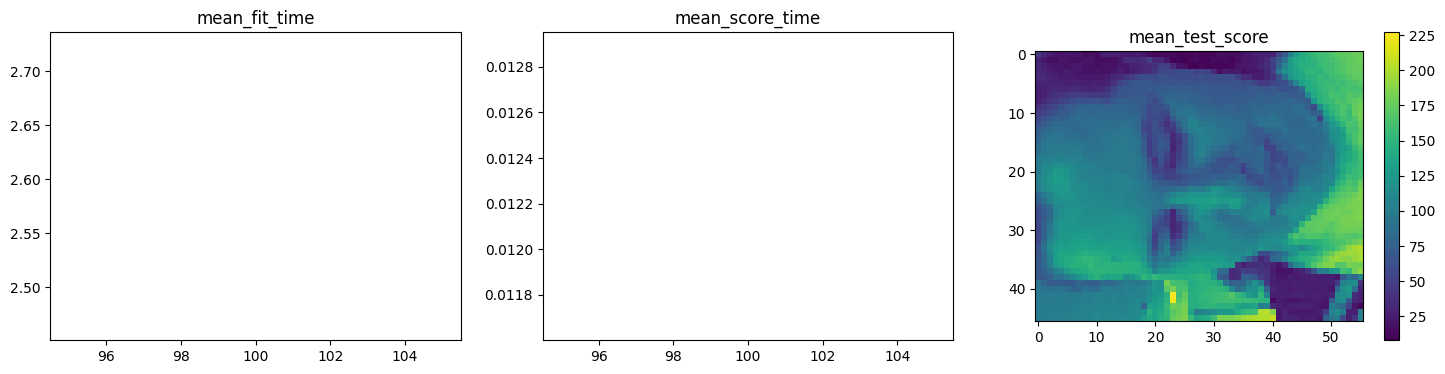

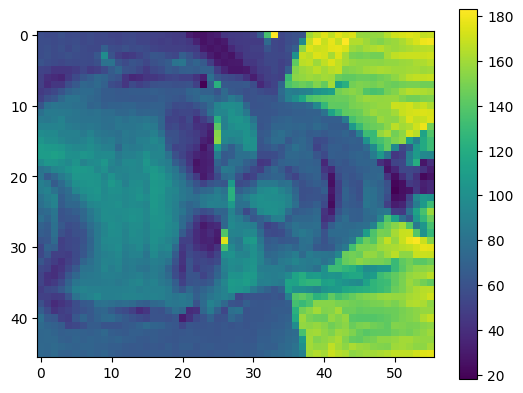

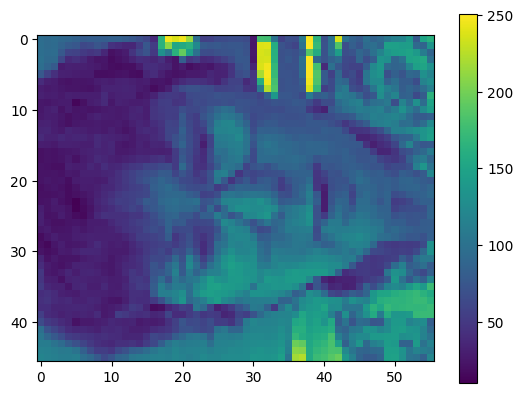

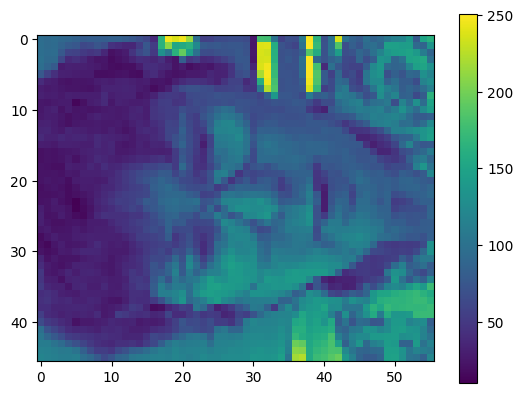

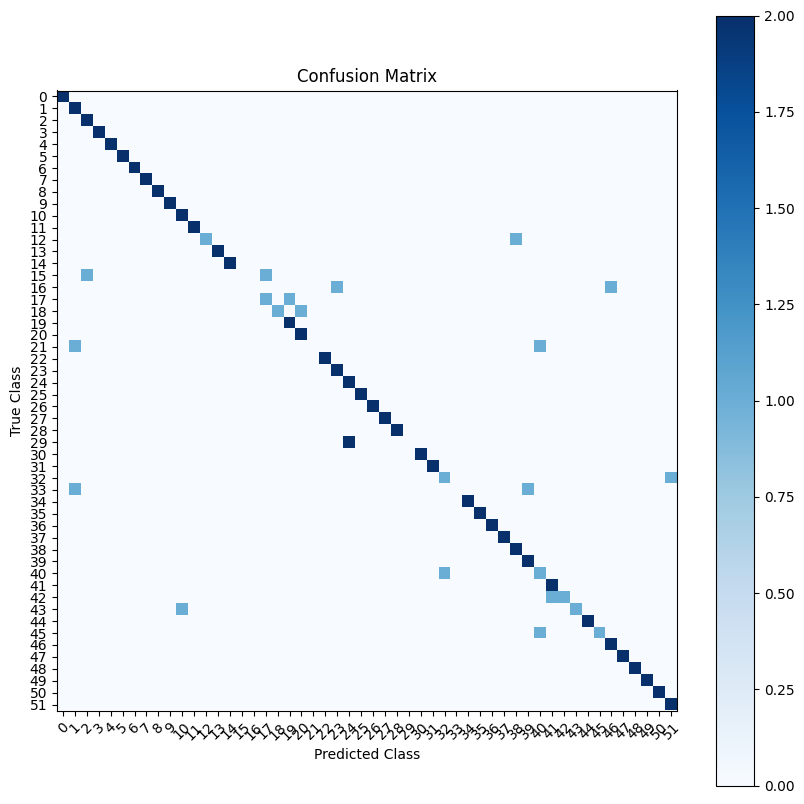

In [ ]:
analyze_result(model_n_estimators,'n_estimators')

In [ ]:
model_max_depth.fit(train_faces,train_labels)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 20)})

mean_fit_time: [0.541501   0.5040585  0.8578527  0.81015172 0.95441232 1.35191588
 1.25462575 1.60842757 1.48901486 1.84010873 1.92289214 1.77147279
 2.09361253 2.1549777  2.15117755 2.11954107 2.31075482 2.33600445
 2.34833527]
mean_score_time: [0.01376185 0.00977798 0.0117547  0.00822539 0.00830946 0.01049418
 0.0090476  0.01276836 0.01018181 0.01049185 0.01217403 0.0099144
 0.0128891  0.01161537 0.01310906 0.01008592 0.01231947 0.01324544
 0.0131969 ]
mean_test_score: [0.13473896 0.21881813 0.2524957  0.33674699 0.3775961  0.41353987
 0.4375502  0.50246701 0.48089501 0.53161216 0.55060241 0.53628801
 0.54842226 0.58680436 0.56267929 0.5435743  0.55315548 0.5458405
 0.56526104]
0.5868043602983362
0.7692307692307693


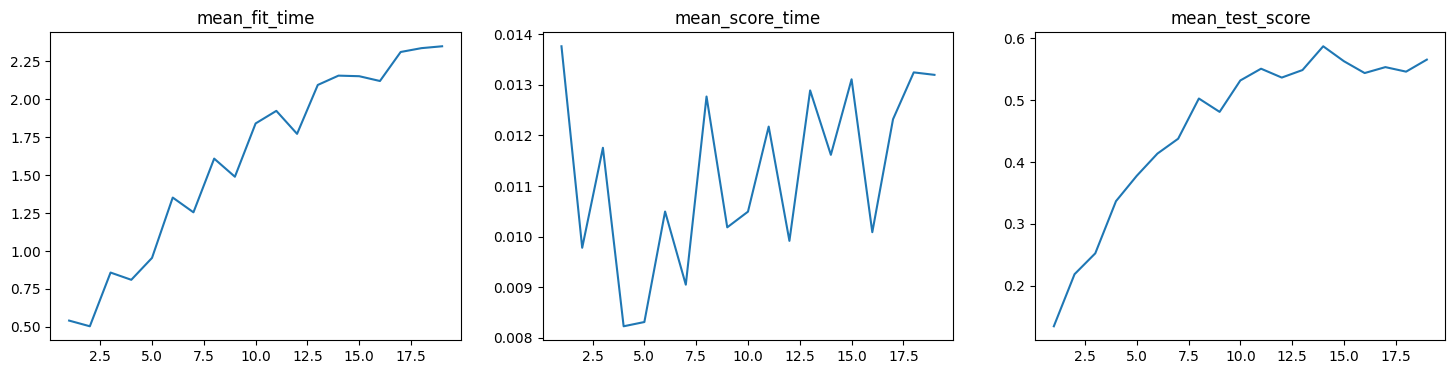

In [ ]:
analyze_result(model_max_depth,'max_depth')

In [ ]:
model_random_state.fit(train_faces,train_labels)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'random_state': range(0, 15)})

mean_fit_time: [2.36030254 2.46528616 2.4824616  2.47181835 2.50547934 2.46809502
 2.56070695 2.30893588 2.41614227 2.47220263 2.4837831  2.46318707
 2.46593614 2.48100786 2.35162201]
mean_score_time: [0.01173248 0.01272497 0.01339545 0.01153002 0.01133127 0.01189971
 0.01429367 0.0110456  0.01107817 0.01162534 0.01204462 0.01298895
 0.01315022 0.01141019 0.01150742]
mean_test_score: [0.58445209 0.57702238 0.58433735 0.57722318 0.56993689 0.54343087
 0.57957544 0.57226047 0.57472748 0.57943201 0.57957544 0.56979346
 0.61563396 0.58436604 0.57492828]
0.6156339644291451
0.8173076923076923


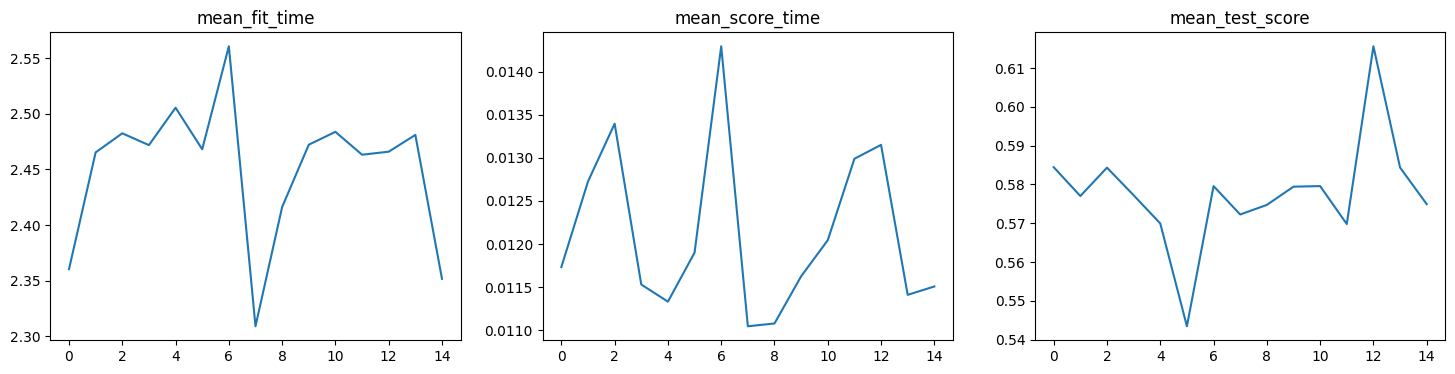

In [ ]:
analyze_result(model_random_state,'random_state')

In [ ]:
import numpy as np
from collections import Counter
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import random

class Node:
    '''
    Helper class which implements a single tree node.
    '''
    def __init__(self, feature=None, threshold=None, data_left=None, data_right=None, gain=None, value=None, pixel1=None, pixel2=None):
        self.feature = feature
        self.threshold = threshold
        self.data_left = data_left
        self.data_right = data_right
        self.gain = gain
        self.value = value
        self.pixel1 = pixel1
        self.pixel2 = pixel2

class DecisionTree:
    '''
    Class which implements a decision tree classifier algorithm.
    '''
    def __init__(self, min_samples_split=2, max_depth=5, weak_learner='axis'):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None
        self.pixel_diffs = None
        self.weak_learner = weak_learner

    @staticmethod
    def _entropy(s):
        '''
        Helper function, calculates entropy from an array of integer values.

        :param s: list
        :return: float, entropy value
        '''
        # Convert to integers to avoid runtime errors
        counts = np.bincount(np.array(s, dtype=np.int64))
        # Probabilities of each class label
        percentages = counts / len(s)

        # Caclulate entropy
        entropy = 0
        for pct in percentages:
            if pct > 0:
                entropy += pct * np.log2(pct)
        return -entropy

    def _information_gain(self, parent, left_child, right_child):
        '''
        Helper function, calculates information gain from a parent and two child nodes.

        :param parent: list, the parent node
        :param left_child: list, left child of a parent
        :param right_child: list, right child of a parent
        :return: float, information gain
        '''
        num_left = len(left_child) / len(parent)
        num_right = len(right_child) / len(parent)

        # One-liner which implements the previously discussed formula
        return self._entropy(parent) - (num_left * self._entropy(left_child) + num_right * self._entropy(right_child))


    def _best_split(self, X, y):
        '''
        Helper function, calculates the best split for given features and target

        :param X: np.array, features
        :param y: np.array or list, target
        :return: dict
        '''
        best_split = {}
        best_info_gain = -1
        n_rows, n_cols = X.shape

        # For every dataset feature
        f_idx = random.randint(0,n_cols-1)


        X_curr = X[:, f_idx]
        # For every unique value of that feature

        #threshold = np.mean(X_curr)

        for threshold in np.unique(X_curr):
          # Construct a dataset and split it to the left and right parts
          # Left part includes records lower or equal to the threshold
          # Right part includes records higher than the threshold
          df = np.concatenate((X, y.reshape(1, -1).T), axis=1)
          df_left = np.array([row for row in df if row[f_idx] <= threshold])
          df_right = np.array([row for row in df if row[f_idx] > threshold])

          # Do the calculation only if there's data in both subsets
          if len(df_left) > 0 and len(df_right) > 0:
              # Obtain the value of the target variable for subsets
              y = df[:, -1]
              y_left = df_left[:, -1]
              y_right = df_right[:, -1]

              # Caclulate the information gain and save the split parameters
              # if the current split if better then the previous best
              gain = self._information_gain(y, y_left, y_right)
              if gain > best_info_gain:
                  best_split = {
                      'feature': f_idx,
                      'threshold': threshold,
                      'df_left': df_left,
                      'df_right': df_right,
                      'gain': gain
                  }
                  best_info_gain = gain
        return best_split

    # Two-pixel Test
    def _best_split_t(self, X, y):
        best_split = {}
        best_info_gain = -1
        n_rows, n_cols = X.shape
        f1_idx = random.randint(0,n_cols-1)
        f2_idx = random.randint(0,n_cols-1)
        while f2_idx == f1_idx:
            f2_idx = random.randint(0,n_cols-1)

        # For every dataset feature
        X_f1 = X[:, f1_idx]
        X_f2 = X[:, f2_idx]

        # Calculate the pixel differences
        pixel_diffs = X_f1 - X_f2

        # For every unique pixel difference value
        #pixel_diff = np.mean(pixel_diffs)
        # Construct a dataset and split it to the left and right parts
        for pixel_diff in np.unique(pixel_diffs):
          df = np.column_stack((X, y))
          df_left = df[pixel_diffs <= pixel_diff]
          df_right = df[pixel_diffs > pixel_diff]

          # Do the calculation only if there's data in both subsets
          if len(df_left) > 0 and len(df_right) > 0:
              y = df[:, -1]
              y_left = df_left[:, -1]
              y_right = df_right[:, -1]

              gain = self._information_gain(y, y_left, y_right)
              if gain > best_info_gain:
                  best_split = {
                      'pixel1': f1_idx,
                      'pixel2': f2_idx,
                      'threshold': pixel_diff,
                      'pixel_diff': pixel_diff,
                      'df_left': df_left,
                      'df_right': df_right,
                      'gain': gain
                  }
                  best_info_gain = gain

        return best_split

    def _build(self, X, y, depth=0):
        '''
        Helper recursive function, used to build a decision tree from the input data.

        :param X: np.array, features
        :param y: np.array or list, target
        :param depth: current depth of a tree, used as a stopping criteria
        :return: Node
        '''
        n_rows, n_cols = X.shape

        # Check to see if a node should be leaf node
        if n_rows >= self.min_samples_split and depth <= self.max_depth:
            # Get the best split
            if self.weak_learner == 'axis':
              best = self._best_split(X, y)
            else:
              best = self._best_split_t(X, y)
            #print(최고)
            # If the split isn't pure
            if best['gain'] > 0:
                # Build a tree on the left
                left = self._build(
                    X=best['df_left'][:, :-1],
                    y=best['df_left'][:, -1],
                    depth=depth + 1
                )
                right = self._build(
                    X=best['df_right'][:, :-1],
                    y=best['df_right'][:, -1],
                    depth=depth + 1
                )
                return Node(
                    feature=best.get('feature'),
                    threshold=best['threshold'],
                    pixel1=best.get('pixel1'),
                    pixel2=best.get('pixel2'),
                    data_left=left,
                    data_right=right,
                    gain=best['gain']
                )
        # Leaf node - value is the most common target value
        return Node(
            value=Counter(y).most_common(1)[0][0]
        )

    def fit(self, X, y):
        '''
        Function used to train a decision tree classifier model.

        :param X: np.array, features
        :param y: np.array or list, target
        :return: None
        '''
        # Call a recursive function to build the tree
        self.root = self._build(X, y)

    def _predict(self, x, tree):
        '''
        Helper recursive function, used to predict a single instance (tree traversal).

        :param x: single observation
        :param tree: built tree
        :return: float, predicted class
        '''
        # Leaf node
        if tree.value != None:
            return tree.value

        if self.weak_learner == 'axis':
          feature_value = x[tree.feature]
        else:
          x = x.astype(np.float64)
          feature_value = x[tree.pixel1] - x[tree.pixel2]

        # Go to the left
        if feature_value <= tree.threshold:
            return self._predict(x=x, tree=tree.data_left)

        # Go to the right
        if feature_value > tree.threshold:
            return self._predict(x=x, tree=tree.data_right)

    def predict(self, X):
        '''
        Function used to classify new instances.

        :param X: np.array, features
        :return: np.array, predicted classes
        '''
        # Call the _predict() function for every observation
        return [self._predict(x, self.root) for x in X]


class RandomForest:
    '''
    A class that implements Random Forest algorithm from scratch.
    '''
    def __init__(self, num_trees=25, min_samples_split=2, max_depth=5, weak_learner='axis'):
        self.num_trees = num_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        # Will store individually trained decision trees
        self.decision_trees = []
        self.weak_learner = weak_learner

    @staticmethod
    def _sample(X, y):
        '''
        Helper function used for boostrap sampling.

        :param X: np.array, features
        :param y: np.array, target
        :return: tuple (sample of features, sample of target)
        '''
        n_rows, n_cols = X.shape
        # Sample with replacement
        samples = np.random.choice(a=n_rows, size=n_rows, replace=True)
        return X[samples], y[samples]

    def fit(self, X, y):
        '''
        Trains a Random Forest classifier.

        :param X: np.array, features
        :param y: np.array, target
        :return: None
        '''
        # Reset
        if len(self.decision_trees) > 0:
            self.decision_trees = []

        # Build each tree of the forest
        num_built = 0
        while num_built < self.num_trees:
            try:
                clf = DecisionTree(
                    min_samples_split=self.min_samples_split,
                    max_depth=self.max_depth,
                    weak_learner=self.weak_learner,
                )
                # Obtain data sample
                _X, _y = self._sample(X, y)
                # Train
                clf.fit(_X, _y)
                # Save the classifier
                self.decision_trees.append(clf)
                num_built += 1
            except Exception as e:
                continue

    def predict(self, X):
        '''
        Predicts class labels for new data instances.

        :param X: np.array, new instances to predict
        :return:
        '''
        # Make predictions with every tree in the forest
        y = []
        for tree in self.decision_trees:
            y.append(tree.predict(X))

        # Reshape so we can find the most common value
        y = np.swapaxes(a=y, axis1=0, axis2=1)

        # Use majority voting for the final prediction
        predictions = []
        for preds in y:
            counter = Counter(preds)
            predictions.append(counter.most_common(1)[0][0])
        return predictions


In [ ]:
from sklearn.metrics import accuracy_score
from time import time

axis_acc = 0
axis_train = 0
axis_test = 0
two_pixel_acc = 0
two_pixel_train = 0
two_pixel_test = 0

N = 1

for _ in range(N):
  model = RandomForest(weak_learner='axis')
  t1 = time()
  model.fit(train_faces, train_labels)
  t2 = time()
  preds = model.predict(test_faces)
  t3 = time()
  preds = np.array(preds, dtype=np.int64)
  axis_acc += accuracy_score(test_labels, preds)/N
  axis_train += (t2-t1)/N
  axis_test += (t3-t2)/N




for _ in range(N):
  model = RandomForest(weak_learner='two_pixel')
  t1 = time()
  model.fit(train_faces, train_labels)
  t2 = time()
  preds = model.predict(test_faces)
  t3 = time()
  preds = np.array(preds, dtype=np.int64)
  two_pixel_acc += accuracy_score(test_labels, preds)/N
  two_pixel_train += (t2-t1)/N
  two_pixel_test += (t3-t2)/N


print(axis_acc)
print(axis_train)
print(axis_test)
print(two_pixel_acc)
print(two_pixel_train)
print(two_pixel_test)




0.27884615384615385
80.35414218902588
0.030435562133789062
0.21153846153846154
65.27589583396912
0.04133033752441406


# Support Vector Machine

In [ ]:
param_kernel = {'kernel':['linear','poly','rbf','sigmoid']}
param_gamma = {'gamma':['scale','auto']}
param_C = {'C':[0.1*i for i in range(1,11)]}
model_kernel = GridSearchCV(SVC(),param_kernel)
model_gamma = GridSearchCV(SVC(),param_gamma)
model_C = GridSearchCV(SVC(),param_C)

In [ ]:
def train_svm_ovr(train_faces,train_labels):
    unique_labels = np.unique(train_labels)
    models = []
    for l in unique_labels:
        cur_labels = np.where(train_labels == l, 1, -1)
        model = SVC(kernel='linear',gamma='scale',class_weight='balanced')
        model.fit(train_faces,cur_labels)
        models.append(model)
    return models

def train_svm_ovo(train_faces,train_labels):
    unique_labels = np.unique(train_labels)
    label_combinations = combinations(unique_labels,2)
    models = []
    for l1,l2 in label_combinations:
        targets = np.where((train_labels == l1) | (train_labels == l2))
        cur_train_faces = train_faces[targets]
        cur_train_labels = train_labels[targets]
        cur_labels = np.where(cur_train_labels == l1, 1, -1)
        model = SVC(kernel='linear',gamma='scale',class_weight='balanced')
        model.fit(cur_train_faces,cur_labels)
        models.append((l1,l2,model))
    return models

def test_svm_ovr(models,test_faces):
    res = np.zeros((test_faces.shape[0], len(models)))
    for i, model in enumerate(models):
        res[:, i] = model.predict(test_faces)
    return np.argmax(res, axis=1)

def test_svm_ovo(models, test_faces):
    res = np.zeros((test_faces.shape[0], len(models)))
    for l1,l2, model in models:
        pred = model.predict(test_faces)
        res[np.where(pred == 1), l1] += 1
        res[np.where(pred == -1), l2] += 1
    return np.argmax(res, axis=1)

In [ ]:
model_kernel.fit(train_faces, train_labels)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

mean_fit_time: [0.17429404 0.16420574 0.19107795 0.18285346]
mean_score_time: [0.03352113 0.03304148 0.06466084 0.0341507 ]
mean_test_score: [0.5842226  0.4904475  0.43757889 0.00481928]
0.5842226047045324
0.8173076923076923


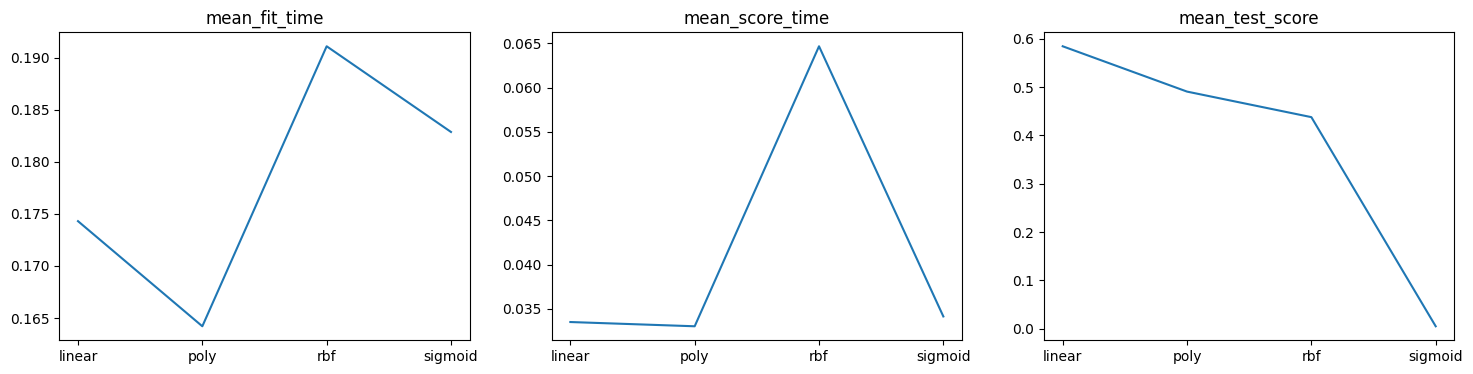

In [ ]:
analyze_result(model_kernel,'kernel')

In [ ]:
model_gamma.fit(train_faces, train_labels)

GridSearchCV(estimator=SVC(), param_grid={'gamma': ['scale', 'auto']})

mean_fit_time: [0.19535131 0.18116846]
mean_score_time: [0.0620728  0.06025701]
mean_test_score: [0.43757889 0.0408778 ]
0.4375788869764773
0.6730769230769231


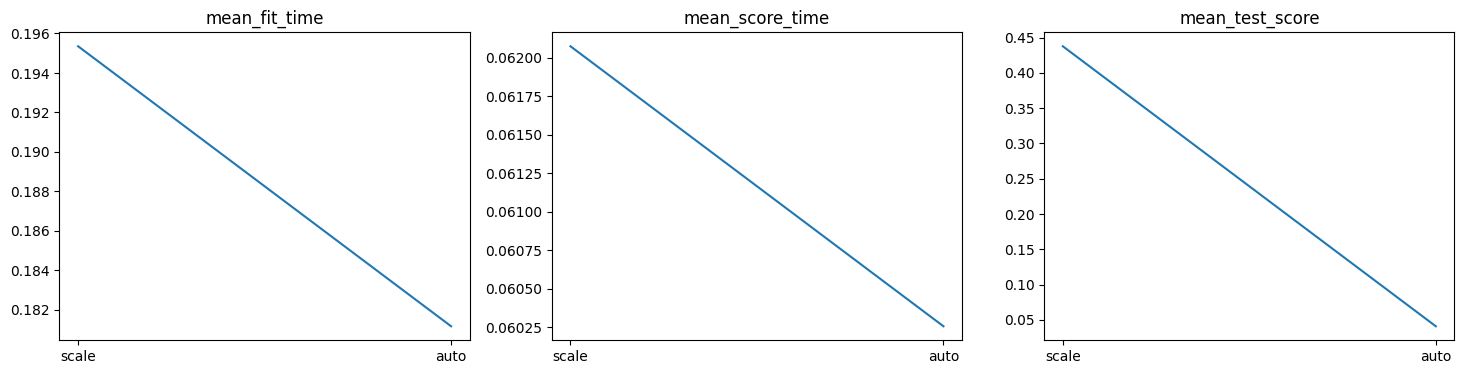

In [ ]:
analyze_result(model_gamma,'gamma')

In [ ]:
model_C.fit(train_faces, train_labels)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8, 0.9,
                               1.0]})

mean_fit_time: [0.31692839 0.23878002 0.23647332 0.19495683 0.19284377 0.19508452
 0.20018325 0.20157609 0.20796738 0.20541358]
mean_score_time: [0.16273193 0.09194193 0.08379297 0.06475925 0.06524086 0.06643567
 0.06614366 0.06758633 0.07496943 0.06733332]
mean_test_score: [0.15616753 0.15616753 0.1609868  0.17056799 0.1777969  0.21626506
 0.2956397  0.36543316 0.40874928 0.43757889]
0.4375788869764773
0.6730769230769231


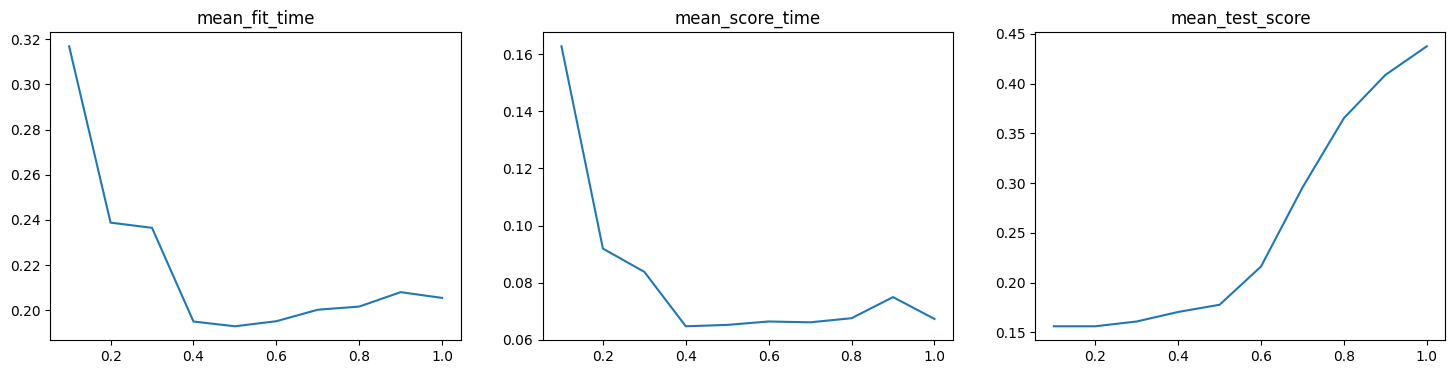

In [ ]:
analyze_result(model_C,'C')

In [ ]:

models_ovr = train_svm_ovr(train_faces,train_labels)
pred_ovr = test_svm_ovr(models_ovr,test_faces)
accuracy_ovr = np.sum(np.where(pred_ovr == test_labels,1,0))/len(test_labels)


models_ovo = train_svm_ovo(train_faces,train_labels)
pred_ovo = test_svm_ovo(models_ovo,test_faces)
accuracy_ovo = np.sum(np.where(pred_ovo == test_labels,1,0))/len(test_labels)


# *Recognition Accuracy, Time Efficiency, Confusion Matrix*

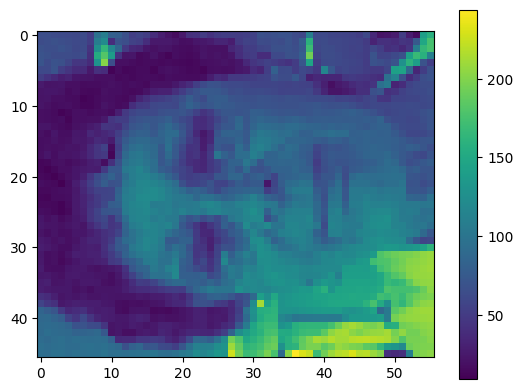

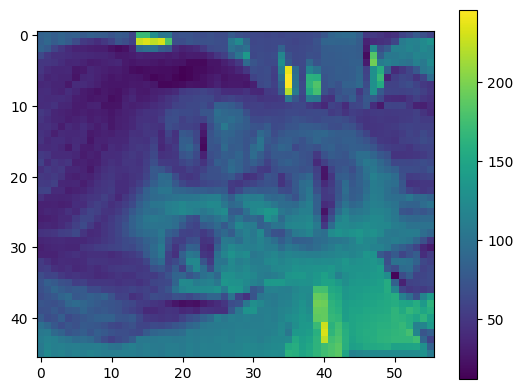

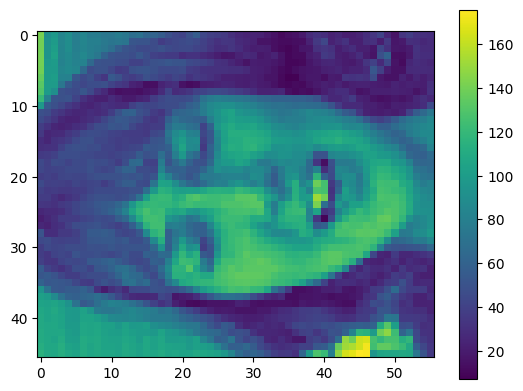

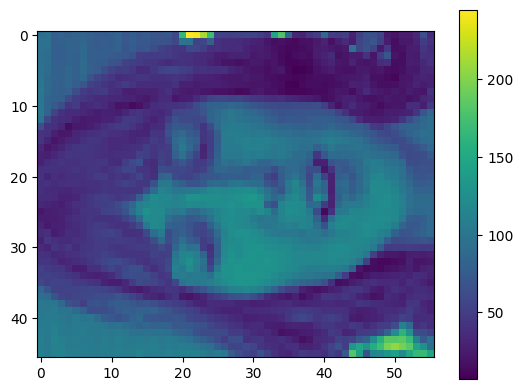

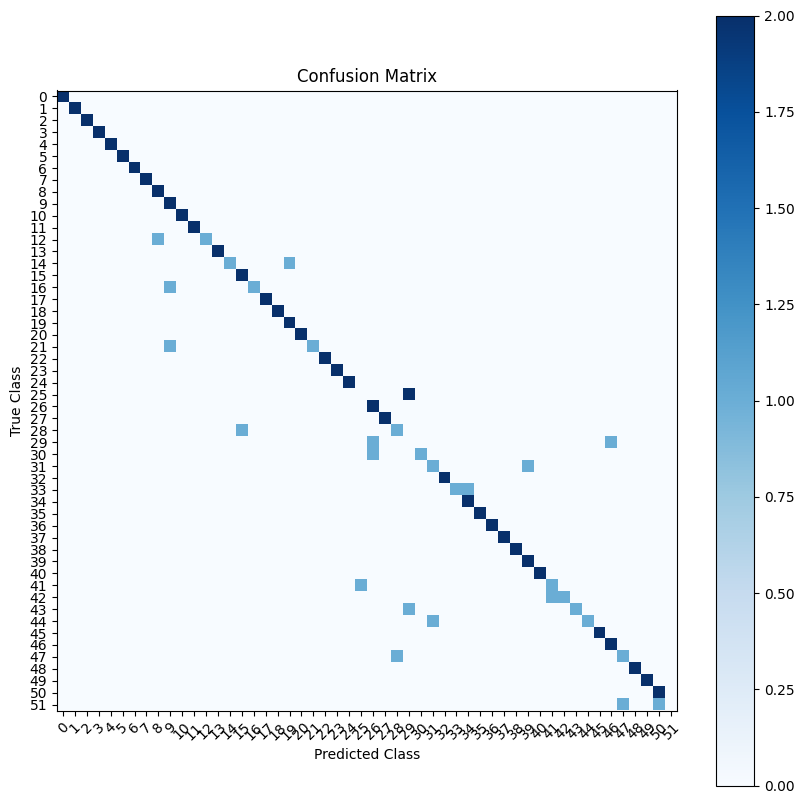

In [ ]:

# fail case
i = find_first_difference(pred_ovo,test_labels,3)

face = test_faces[i,:].reshape(46,56)
plt.imshow(face)
plt.colorbar()
plt.show()

pred_face = test_faces[2*pred_ovo[i],:].reshape(46,56)
plt.imshow(pred_face)
plt.colorbar()
plt.show()

# succes case

i = find_first_equal(pred_ovo,test_labels,6)

face = test_faces[i,:].reshape(46,56)
plt.imshow(face)
plt.colorbar()
plt.show()

pred_face = test_faces[2*pred_ovo[i],:].reshape(46,56)
plt.imshow(pred_face)
plt.colorbar()
plt.show()


confusion = confusion_matrix(test_labels, pred_ovo)

plt.figure(figsize=(10, 10))
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

classes = list(set(train_labels))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

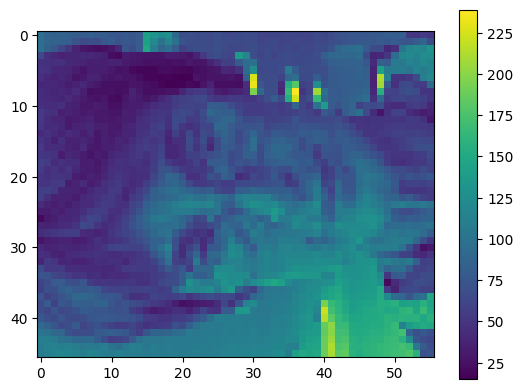

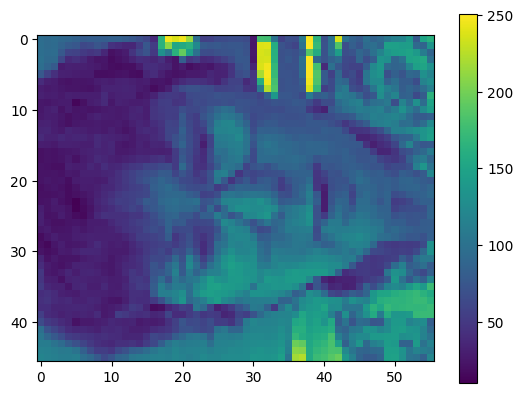

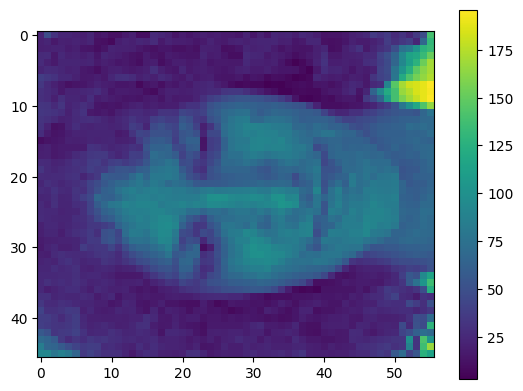

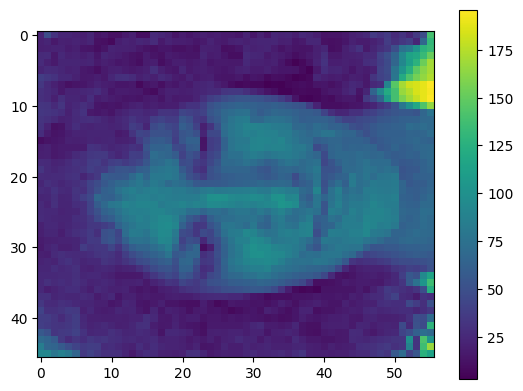

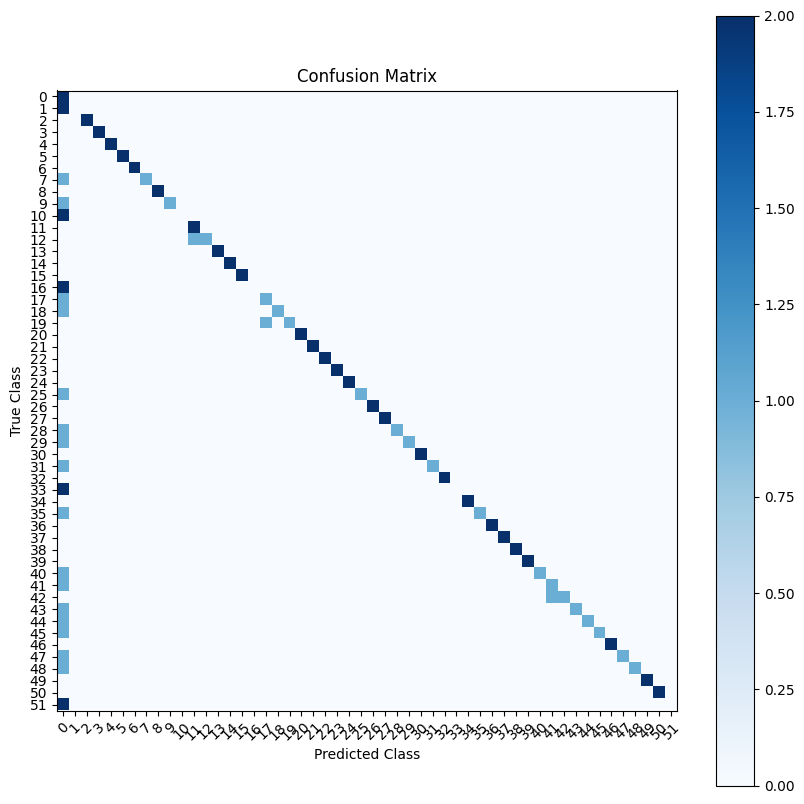

In [ ]:
# fail case
i = find_first_difference(pred_ovr,test_labels,4)

face = test_faces[i,:].reshape(46,56)
plt.imshow(face)
plt.colorbar()
plt.show()

pred_face = test_faces[2*pred_ovr[i],:].reshape(46,56)
plt.imshow(pred_face)
plt.colorbar()
plt.show()

# succes case

i = find_first_equal(pred_ovr,test_labels,5)

face = test_faces[i,:].reshape(46,56)
plt.imshow(face)
plt.colorbar()
plt.show()

pred_face = test_faces[2*pred_ovr[i],:].reshape(46,56)
plt.imshow(pred_face)
plt.colorbar()
plt.show()


confusion = confusion_matrix(test_labels, pred_ovr)

plt.figure(figsize=(10, 10))
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

classes = list(set(train_labels))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [ ]:
def get_margin_and_support_vectors(model, train_faces):
    # 서포트 벡터를 얻습니다.
    support_vectors = model.support_vectors_

    # 결정 함수 값(거리)을 얻습니다.
    decision_values = model.decision_function(train_faces)

    # 마진을 계산합니다.
    margin = 2 / np.linalg.norm(model.coef_)

    return support_vectors, margin

# SVM OvR 모델에 대한 margin과 서포트 벡터를 얻습니다.

ovr_margins_and_sv = []
for i, model in enumerate(models_ovr):
    support_vectors, margin = get_margin_and_support_vectors(model, train_faces)
    ovr_margins_and_sv.append((i,support_vectors, margin))

# SVM OvO 모델에 대한 margin과 서포트 벡터를 얻습니다.

ovo_margins_and_sv = []
for l1, l2, model in models_ovo:
    support_vectors, margin = get_margin_and_support_vectors(model, train_faces)
    ovo_margins_and_sv.append((l1, l2, support_vectors, margin))



In [ ]:
l,support_vectors, margin = random.choice(ovr_margins_and_sv)
print(l)
print(f"Margin: {margin}")
print(support_vectors)

l1,l2,support_vectors, margin = random.choice(ovo_margins_and_sv)
print(l1,l2)
print(f"Margin: {margin}")
print(support_vectors)


18
Margin: 480.21389416559214
[[169. 148. 126. ...  25.  23.  21.]
 [156. 182. 206. ...  86.  77.  82.]
 [ 85.  77.  56. ...  62.  62.  62.]
 ...
 [222. 231. 223. ... 143. 148. 150.]
 [ 87.  73.  59. ...  32.  31.  36.]
 [115. 115. 118. ...  58.  54.  51.]]
7 51
Margin: 1300.6071929451614
[[ 27.  29.  30. ...  80. 127. 181.]
 [215. 230. 237. ...  50.  45.  41.]
 [188. 186. 195. ...  60.  62.  58.]
 ...
 [116. 109. 115. ... 154. 178. 196.]
 [118. 108. 106. ...  66.  59.  92.]
 [104. 105. 100. ... 103. 107. 108.]]


# Example of Support Vectors and success/failure images


In [ ]:
print(model_svc.best_estimator_.support_vectors_)

margin = 2 / (model_svc.best_estimator_.coef_ ** 2).sum()  # 소프트 마진의 경우
#margin = 2 / (model_svc.best_estimator_.coef_ ** 2).sum() - model_svc.best_estimator_.intercept_ / np.linalg.norm(model_svc.best_estimator_.coef_)  # 하드 마진의 경우

print("Margin:", margin)

[[106. 103. 103. ...  37.  36.  41.]
 [130. 129. 130. ...  40.  36.  35.]
 [191. 185. 174. ...  22.  19.  17.]
 ...
 [181. 170. 163. ...  61.  50.  45.]
 [ 60.  68.  71. ...  41.  48.  65.]
 [ 70.  62.  83. ...  87.  89.  94.]]
Margin: 648.1262320039908
